from https://stackoverflow.com/questions/45839957/python-how-do-i-compute-interactive-spatial-autocorrelation-moran-i-using-py

In [53]:
from libpysal.weights import lat2W
from esda.moran import Moran
import numpy as np
import os
import pandas as pd
from seaborn import heatmap
import matplotlib.pyplot as plt

In [111]:
# Use your matrix here, instead of this random one
Z = np.random.rand(200,150)

# Create the matrix of weigthts 
w = lat2W(Z.shape[0], Z.shape[1]) #WHICH WEIGHT MATRIX TO USE???

# Crate the pysal Moran object 
mi = Moran(Z, w)

# Verify Moran's I results 
print(mi.I) 
print(mi.p_norm)

-0.0017690511412378016
0.6718522003486361


<AxesSubplot:>

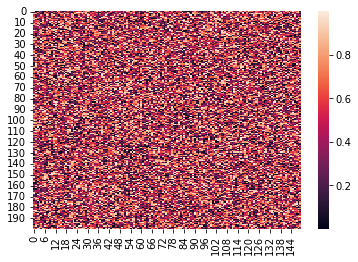

In [112]:
heatmap(Z)

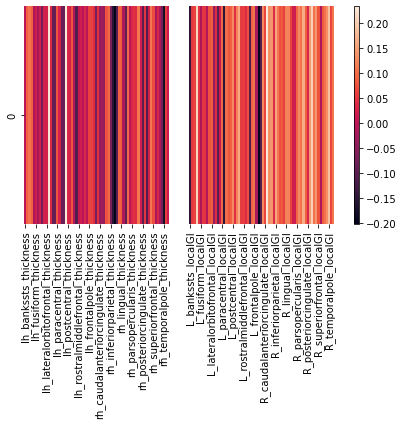

In [113]:
# Import tmaps, ordered as in original AHBA
os.chdir(r'C:\Users\Acer\Documents\Studium\PhD\01_MA_preterm_gene-expression\analysis\data\tmaps\entrez_compatible')
CT = pd.read_csv('T_lhrh_thickness_term-preterm.csv')
GYR = pd.read_csv('T_lhrh_gyrification_term-preterm.csv')

fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[30,30,1]))

vmin = min(CT.values.min(), GYR.values.min())
vmax = max(CT.values.max(), GYR.values.max())
sns.heatmap(CT, annot=False, cbar=False, ax=axs[0], vmin=vmin)
sns.heatmap(GYR, annot=False, yticklabels=False, cbar=False, ax=axs[1], vmax=vmax)

fig.colorbar(axs[1].collections[0], cax=axs[2])

plt.show()

In [27]:
# Import gene expression data, ordered as in original AHBA
os.chdir(r'C:\Users\Acer\Documents\Studium\PhD\01_MA_preterm_gene-expression\analysis\data\microarray')
genes = pd.read_csv('expression_brainorder.csv', index_col=0).T
#reglabels = list(genes.index)
#genelabels = list(genes.columns)
#print("Your input gene list contains expression data for", len(genelabels), "across", len(reglabels), "regions...")
#genes.head()

In [114]:
# convert to numpy array
genes_np = genes.to_numpy()
CT_np = CT.to_numpy()
GYR_np = GYR.to_numpy()

In [115]:
## THICKNESS
# Create the matrix of weigthts 
w = lat2W(CT_np.shape[0], CT_np.shape[1])

# Crate the pysal Moran object 
mi = Moran(CT_np, w, permutations=50000)

# Verify Moran's I results 
print(mi.I) 
print(mi.p_norm)

0.17026734723647194
0.12524524001073578


In [116]:
## GYRIFICATION
# Create the matrix of weigthts 
w = lat2W(GYR_np.shape[0], GYR_np.shape[1])

# Crate the pysal Moran object 
mi = Moran(GYR_np, w, permutations=50000)

# Verify Moran's I results 
print(mi.I) 
print(mi.p_norm)

0.23968370773032865
0.035049160123638234


# Full information GYR

<AxesSubplot:>

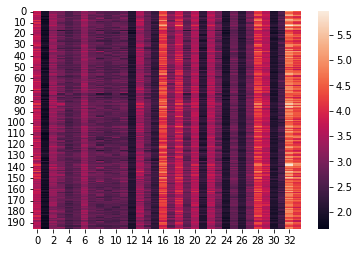

In [133]:
os.chdir(r'C:\Users\Acer\Documents\Studium\PhD\01_MA_preterm_gene-expression\analysis\data\FS_data')
all_gyr = pd.read_csv('aparc_lh_gyrification_PretermStudy.txt', sep='\t', index_col=0)
all_gyr = all_gyr.dropna()
all_gyr_np = all_gyr.to_numpy()
sub001 = all_gyr_np[0,:]

heatmap(all_gyr_np)

In [128]:
## GYRIFICATION ALL SUBS
# Create the matrix of weigthts 
w = lat2W(all_gyr_np.shape[0], all_gyr_np.shape[1])

# Crate the pysal Moran object 
mi = Moran(all_gyr_np, w)

# Verify Moran's I results 
print(mi.I) 
print(mi.p_norm)

0.5014720163950682
0.0


In [138]:
sub001.shape[0]

34

In [139]:
## GYRIFICATION SUB001
# Create the matrix of weigthts 
w = lat2W(sub001.shape[0], 1)

# Crate the pysal Moran object 
mi = Moran(sub001, w)

# Verify Moran's I results 
print(mi.I) 
print(mi.p_norm)

0.0691717384958032
0.5586292789217338
